In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import pandas_datareader as pdr
key="b8c30790650f818b57e22dc1557e54ef1e4e46c8"

In [31]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [32]:
df

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2016-12-27 00:00:00+00:00  117.26  117.8000  ...      0.0          1.0
       2016-12-28 00:00:00+00:00  116.76  118.0166  ...      0.0          1.0
       2016-12-29 00:00:00+00:00  116.73  117.1095  ...      0.0          1.0
       2016-12-30 00:00:00+00:00  115.82  117.2000  ...      0.0          1.0
       2017-01-03 00:00:00+00:00  116.15  116.3300  ...      0.0          1.0
...                                  ...       ...  ...      ...          ...
       2021-12-17 00:00:00+00:00  171.14  173.4700  ...      0.0          1.0
       2021-12-20 00:00:00+00:00  169.75  170.5800  ...      0.0          1.0
       2021-12-21 00:00:00+00:00  172.99  173.2000  ...      0.0          1.0
       2021-12-22 00:00:00+00:00  175.64  175.8600  ...      0.0          1.0
       2021-12-23 00:00:00+00:00  176.28  176.8499  ...      0.0          1.0

[1258 rows x 12 columns]

In [33]:
df.to_csv('AAPL1.csv')

In [34]:
df=pd.read_csv('AAPL1.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-27 00:00:00+00:00,117.26,117.8000,116.49,116.52,18296855,27.590363,27.717421,27.409188,27.416247,73187420,0.0,1.0
1,AAPL,2016-12-28 00:00:00+00:00,116.76,118.0166,116.20,117.52,20905892,27.472717,27.768385,27.340953,27.651539,83623568,0.0,1.0
2,AAPL,2016-12-29 00:00:00+00:00,116.73,117.1095,116.40,116.45,15039519,27.465658,27.554951,27.388012,27.399776,60158076,0.0,1.0
3,AAPL,2016-12-30 00:00:00+00:00,115.82,117.2000,115.43,116.65,30586265,27.251542,27.576245,27.159778,27.446835,122345060,0.0,1.0
4,AAPL,2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865,27.329189,27.371541,27.002132,27.246836,115127460,0.0,1.0


In [35]:
df1=df.reset_index()['close']

In [36]:
df1

0       117.26
1       116.76
2       116.73
3       115.82
4       116.15
         ...  
1253    171.14
1254    169.75
1255    172.99
1256    175.64
1257    176.28
Name: close, Length: 1258, dtype: float64

No handles with labels found to put in legend.


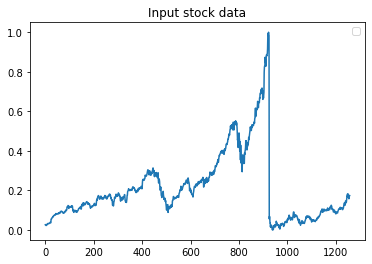

In [74]:
plt.plot(df1)
plt.title('Input stock data')
plt.savefig('Input stock data')

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
print(df1)

[[0.02609894]
 [0.02484659]
 [0.02477145]
 ...
 [0.16568566]
 [0.17232311]
 [0.17392611]]


In [40]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [41]:
training_size,test_size

(817, 441)

In [42]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [43]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


In [45]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape)
print(X_test.shape)

(716, 100, 1)
(340, 100, 1)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
r=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
12/12 [==============================] - 8s 258ms/step - loss: 0.0233 - val_loss: 0.0190
Epoch 2/200
12/12 [==============================] - 1s 96ms/step - loss: 0.0037 - val_loss: 0.0233
Epoch 3/200
12/12 [==============================] - 1s 95ms/step - loss: 0.0020 - val_loss: 0.0192
Epoch 4/200
12/12 [==============================] - 1s 96ms/step - loss: 0.0011 - val_loss: 0.0214
Epoch 5/200
12/12 [==============================] - 1s 85ms/step - loss: 9.9484e-04 - val_loss: 0.0185
Epoch 6/200
12/12 [==============================] - 1s 85ms/step - loss: 9.2775e-04 - val_loss: 0.0174
Epoch 7/200
12/12 [==============================] - 1s 85ms/step - loss: 9.0367e-04 - val_loss: 0.0185
Epoch 8/200
12/12 [==============================] - 1s 84ms/step - loss: 7.8651e-04 - val_loss: 0.0182
Epoch 9/200
12/12 [==============================] - 1s 84ms/step - loss: 7.2436e-04 - val_loss: 0.0173
Epoch 10/200
12/12 [==============================] - 1s 84ms/step - loss: 6.92

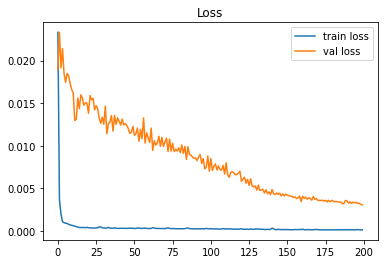

<Figure size 432x288 with 0 Axes>

In [76]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()
plt.savefig('LossVal_loss')

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011751315671796238

In [54]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.055449513816076

In [55]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

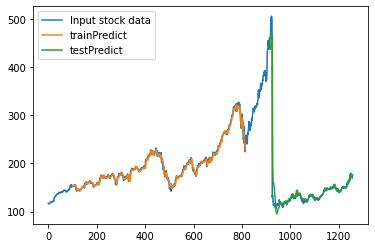

<Figure size 432x288 with 0 Axes>

In [79]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Input stock data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend()
plt.show()
plt.savefig('TrainTestPredict')

forcasting stocks of 30 days

In [57]:
len(test_data)

441

In [58]:
len(df1)

1258

In [59]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
x_input

array([[0.10046337, 0.10073889, 0.09843456, 0.09830933, 0.09708203,
        0.09773325, 0.10532248, 0.10584847, 0.11090795, 0.10857858,
        0.0989856 , 0.09983719, 0.10356919, 0.10737633, 0.10715091,
        0.10399499, 0.10194114, 0.10459612, 0.11591735, 0.11268629,
        0.11438948, 0.11724483, 0.11887289, 0.12485911, 0.12090169,
        0.11829681, 0.10552286, 0.10697558, 0.10339386, 0.10567314,
        0.10507201, 0.09823419, 0.09041954, 0.09164684, 0.0977082 ,
        0.10016281, 0.10038823, 0.09650595, 0.0878397 , 0.09014402,
        0.08681277, 0.08969317, 0.08090169, 0.08583594, 0.08806512,
        0.09129618, 0.09031935, 0.09009393, 0.08683782, 0.085335  ,
        0.09247339, 0.09517846, 0.09946149, 0.10499687, 0.10624922,
        0.10680025, 0.10482154, 0.10469631, 0.1063995 , 0.10522229,
        0.11453976, 0.10760175, 0.10549781, 0.10815279, 0.11183469,
        0.1105072 , 0.1113087 , 0.10920476, 0.1101315 , 0.10289292,
        0.10276769, 0.10807765, 0.10810269, 0.11

In [61]:
temp_input=list(x_input)

In [62]:
temp_input

[array([0.10046337, 0.10073889, 0.09843456, 0.09830933, 0.09708203,
        0.09773325, 0.10532248, 0.10584847, 0.11090795, 0.10857858,
        0.0989856 , 0.09983719, 0.10356919, 0.10737633, 0.10715091,
        0.10399499, 0.10194114, 0.10459612, 0.11591735, 0.11268629,
        0.11438948, 0.11724483, 0.11887289, 0.12485911, 0.12090169,
        0.11829681, 0.10552286, 0.10697558, 0.10339386, 0.10567314,
        0.10507201, 0.09823419, 0.09041954, 0.09164684, 0.0977082 ,
        0.10016281, 0.10038823, 0.09650595, 0.0878397 , 0.09014402,
        0.08681277, 0.08969317, 0.08090169, 0.08583594, 0.08806512,
        0.09129618, 0.09031935, 0.09009393, 0.08683782, 0.085335  ,
        0.09247339, 0.09517846, 0.09946149, 0.10499687, 0.10624922,
        0.10680025, 0.10482154, 0.10469631, 0.1063995 , 0.10522229,
        0.11453976, 0.10760175, 0.10549781, 0.10815279, 0.11183469,
        0.1105072 , 0.1113087 , 0.10920476, 0.1101315 , 0.10289292,
        0.10276769, 0.10807765, 0.10810269, 0.11

In [63]:
temp_input=temp_input[0].tolist()

In [64]:
temp_input

[0.10046336881653095,
 0.10073888541014397,
 0.09843456480901686,
 0.0983093299937382,
 0.09708202880400746,
 0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.091296180338133

In [65]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1671236]
101
1 day input [0.10073889 0.09843456 0.09830933 0.09708203 0.09773325 0.10532248
 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719 0.10356919
 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735
 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169
 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201
 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823
 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169
 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782
 0.085335   0.09247339 0.09517846 0.09946149 0.10499687 0.10624922
 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976
 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087
 0.10920476 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269
 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128
 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731
 0.1377583  0.14647464 0.16115216 0

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

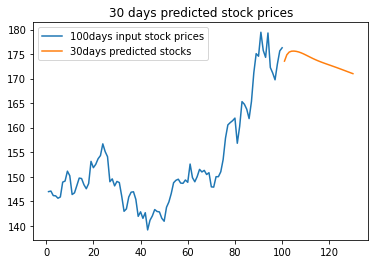

In [83]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]), label='100days input stock prices')
plt.plot(day_pred,scaler.inverse_transform(lst_output), label='30days predicted stocks')
plt.legend()
plt.title('30 days predicted stock prices')
plt.savefig('predicted_stockprices')

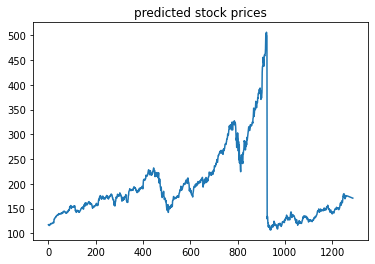

In [84]:
df3=scaler.inverse_transform(df1).tolist()
df3.extend(scaler.inverse_transform(lst_output))
plt.plot(df3)
plt.title('predicted stock prices')
plt.savefig('predicted_stockprices_complete')

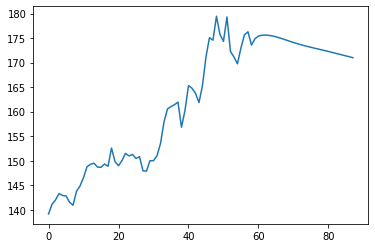

In [72]:
plt.plot(df3[1200:])